<a href="https://colab.research.google.com/github/Dheeraj101097/cutu_bot/blob/googlecolab/imggenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the required libraries
!pip install -q diffusers transformers accelerate safetensors invisible_watermark
print("Installation complete!")

Installation complete!


In [4]:
import torch
from diffusers import DiffusionPipeline
from google.colab import drive
import os

# 1. Mount Google Drive so you can save images permanently
# A popup will ask for permission to access your Drive.
drive.mount('/content/drive')

# Create a folder in your Drive to store images
save_folder = "/content/drive/MyDrive/AI_Images_SDXL"
os.makedirs(save_folder, exist_ok=True)
print(f"Images will be saved to: {save_folder}")

# 2. Load the SDXL Model
# We use torch.float16 to fit it into the free Colab GPU memory
print("Downloading and loading SDXL Base 1.0... (This takes 2-3 minutes)")

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

# Move the model to the GPU
pipe.to("cuda")

# Optimization for speed (optional, good for T4 GPUs)
pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

print("Model loaded successfully! You are ready to generate.")

Mounted at /content/drive
Images will be saved to: /content/drive/MyDrive/AI_Images_SDXL


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

Model loaded successfully! You are ready to generate.


In [7]:
# generated nut lot of time becoz of pytorce load evertime and 14gm mem issue solved in 3rd box
import torch
from IPython.display import display

# ==========================================
# 1. EDIT YOUR PROMPT HERE
# ==========================================
my_prompt = "A cute small boy watching movies"

# Optional: Things you DON'T want in the image
my_negative_prompt = "ugly, blurry, low quality, deformed, text, watermark, bad anatomy"

# ==========================================
# 2. RUN GENERATION
# ==========================================
print(f"Generating image for: '{my_prompt}'...")

# The actual AI generation step
image = pipe(
    prompt=my_prompt,
    negative_prompt=my_negative_prompt,
    num_inference_steps=30,  # 30 is fast. Use 50 for higher quality.
    guidance_scale=7.5,      # How strictly to follow your text (7-9 is best)
    height=1024, width=1024  # SDXL works best at 1024x1024
).images[0]

# ==========================================
# 3. SAVE & DISPLAY
# ==========================================
# This saves it to your Google Drive folder automatically
import time
timestamp = int(time.time())
save_path = f"{save_folder}/generated_{timestamp}.png"
image.save(save_path)

print(f"Success! Saved to Google Drive: {save_path}")
display(image)

Generating image for: 'A cute small boy watching movies'...


  0%|          | 0/30 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 80.00 MiB. GPU 0 has a total capacity of 14.56 GiB of which 19.81 MiB is free. Including non-PyTorch memory, this process has 14.54 GiB memory in use. Of the allocated memory 13.82 GiB is allocated by PyTorch, with 552.00 MiB allocated in private pools (e.g., CUDA Graphs), and 569.27 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [6]:
# 14gm mem issue solved in 3rd box
import torch
from diffusers import DiffusionPipeline
import warnings

# 1. Silence the red warnings so your output is clean
# warnings.filterwarnings("ignore")

print("Loading model (Clean Mode)...")

# 2. Load the model
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

# 3. FIX for the "upcast_vae" warning
# We manually set the VAE (the image decoder) to 32-bit precision.
# This fixes the warning and prevents "black image" bugs.
pipe.vae = pipe.vae.to(torch.float32)

# 4. Enable Memory Saving (Crucial for Colab Free Tier)
pipe.enable_vae_slicing()

# 5. Generate
# Change this prompt to whatever you want!
prompt = "A cute small boy watching movies"

print(f"Generating: {prompt}")
image = pipe(
    prompt=prompt,
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]

# 6. Save & Display
save_path = "/content/drive/MyDrive/AI_Images_SDXL/my_clean_image.png"
image.save(save_path)
print(f"Success! Saved to: {save_path}")

from IPython.display import display
display(image)

Loading model (Clean Mode)...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

Generating: A cute small boy watching movies


/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/pipeline_utils.py:2186: FutureWarning: `enable_vae_slicing` is deprecated and will be removed in version 0.40.0. Calling `enable_vae_slicing()` on a `StableDiffusionXLPipeline` is deprecated and this method will be removed in a future version. Please use `pipe.vae.enable_slicing()`.
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 60.00 MiB. GPU 0 has a total capacity of 14.56 GiB of which 19.81 MiB is free. Including non-PyTorch memory, this process has 14.54 GiB memory in use. Of the allocated memory 13.71 GiB is allocated by PyTorch, with 552.00 MiB allocated in private pools (e.g., CUDA Graphs), and 687.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Loading SDXL in Low-RAM Mode...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Generating: 'A cute small boy watching movies, 8k, cinematic lighting, highly detailed'


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


Saved to: /content/drive/MyDrive/AI_Images_SDXL/boy_watching_movies.png


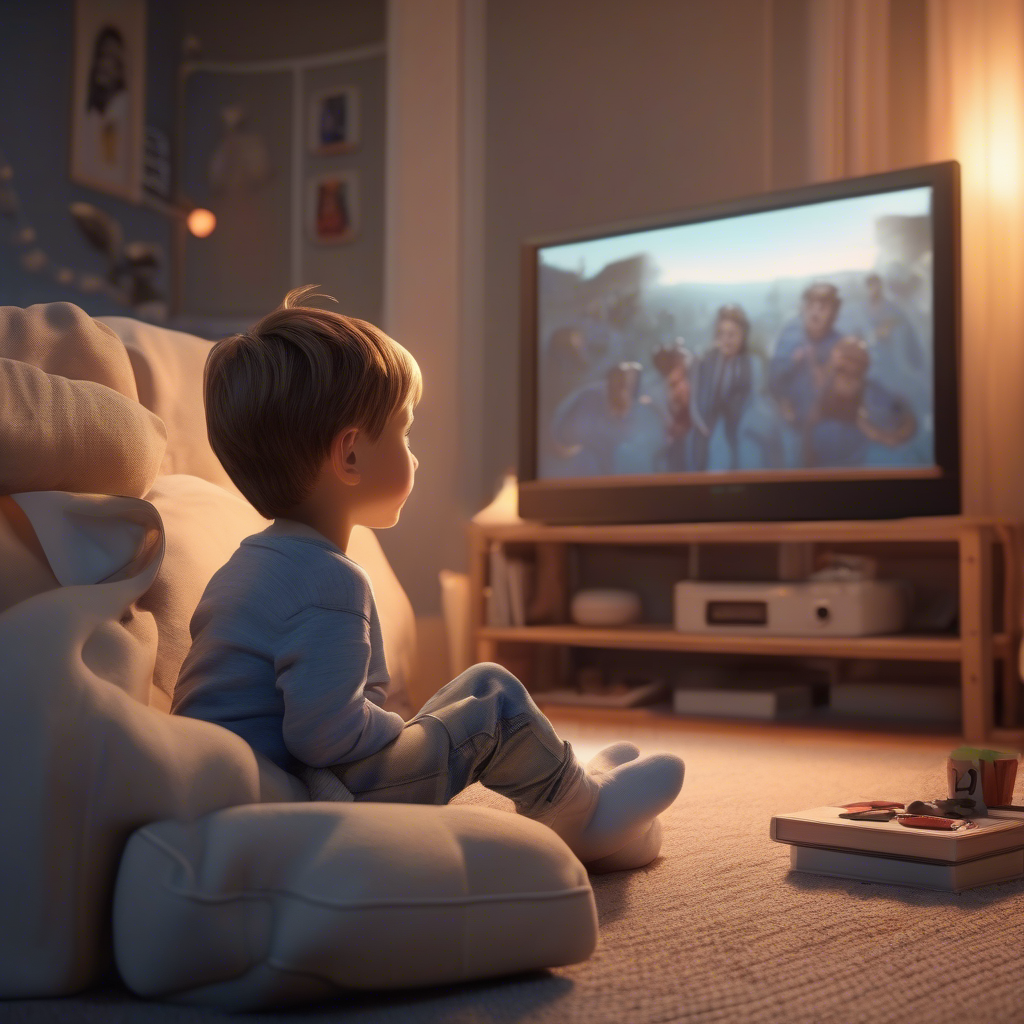

In [1]:
import torch
from diffusers import DiffusionPipeline
import gc

# 1. Clean up any garbage memory just in case
gc.collect()
torch.cuda.empty_cache()

print("Loading SDXL in Low-RAM Mode...")

# 2. Load the model
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

# 3. CRITICAL FIX: Don't put the whole thing on GPU.
# Instead, use 'enable_model_cpu_offload()'.
# This manages memory automatically so you never hit 100% usage.
pipe.enable_model_cpu_offload()

# 4. Enable slicing for the VAE (Decodes image in tiny chunks)
# This fixes the warning you saw earlier too.
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()

# 5. Generate
prompt = "A cute small boy watching movies, 8k, cinematic lighting, highly detailed"
negative_prompt = "ugly, blurry, low quality"

print(f"Generating: '{prompt}'")

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]

# 6. Save & Display
save_path = "/content/drive/MyDrive/AI_Images_SDXL/boy_watching_movies.png"
image.save(save_path)

print(f"Saved to: {save_path}")
from IPython.display import display
display(image)